In [1]:
PATH_TO_GAPSE = "../";

In [2]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [3]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions
using Printf, LaTeXStrings

In [4]:
FILE_F_MAP = PATH_TO_GAPSE * "test/datatest/F_REFERENCE.txt"
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt"
FILE_BACKGROUND = PATH_TO_GAPSE * "test/datatest/WideA_ZA_background.dat"

z_min, z_max, θ_max = 0.05, 0.20, π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
    Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70, s_lim=1e-2,
    IPS_opts = Dict(
        :fit_left_min => 1e-6, :fit_left_max => 3e-6,
        :fit_right_min => 1e1, :fit_right_max => 2e1),
    IPSTools_opts = Dict(
        :N => 1024, :fit_min => 0.05, :fit_max => 0.5, 
        :con => true, :k_min => 1e-8, :k_max => 10.0),
)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP);

GaPSE.parameters_used(stdout, cosmo)

###############
#    GaPSE    #
############### 
#
# The Cosmology considered had the following paremeters:
# 
# - Matter Power Spectrum input file: "../test/datatest/file_pk.txt"
# - F window function input file: "../test/datatest/F_REFERENCE.txt"
# - Background data input file: "../test/datatest/WideA_ZA_background.dat"
#
# - Basic CosmoParams considered: 
#	 z_min = 0.05 	 z_max = 0.2
#	 theta_max = 1.5707963267948966 [rad] 	 h_0 = 0.7
#	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
#
# - CosmoParams about the Input Power Spectrum: 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#
# - CosmoParams about the Input Power Spectrum Tools: 
#	 k_max = 10.0 	 N = 1024 	 fit_max = 0.5 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 
#
# - Computed quantities: 
# 	 effective redshift z_eff = 0.15045636096023224 
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.

In [5]:
L=0;

In [6]:
IMPLEMENTED_GR_EFFECTS = [
     "auto_doppler", "auto_lensing",
     "auto_localgp", "auto_integratedgp",

     "lensing_doppler", "doppler_lensing",
     "doppler_localgp", "localgp_doppler",
     "doppler_integratedgp",  "integratedgp_doppler",
     "lensing_localgp", "localgp_lensing",
     "lensing_integratedgp",  "integratedgp_lensing",
     "localgp_integratedgp", "integratedgp_localgp",
];

ξs_names = [
    L"$\xi^{v_{\parallel} \, v_{\parallel}}_{L=%$L}(s)$", 
    L"$\xi^{\kappa \, \kappa}_{L=%$L}(s)$", 
    L"$\xi^{\phi \, \phi}_{L=%$L}(s)$", 
    L"$\xi^{\int\phi \, \int\phi}_{L=%$L}(s)$", 
    
    L"$\xi^{\kappa \, v_{\parallel}}_{L=%$L}(s)$",
    L"$\xi^{v_{\parallel} \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{v_{\parallel} \, \phi}_{L=%$L}(s)$",
    L"$\xi^{\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L"$\xi^{v_{\parallel} \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, v_{\parallel}}_{L=%$L}(s)$",
    
    L"$\xi^{\kappa \, \phi}_{L=%$L}(s)$",
    L"$\xi^{\phi \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{\kappa \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, \kappa}_{L=%$L}(s)$",
    
    L"$\xi^{\phi \, \int\phi}_{L=%$L}(s)$",
    L"$\xi^{\int\phi \, \phi}_{L=%$L}(s)$",
]

negatives = [
    "auto_localgp", "auto_integratedgp",

    "lensing_doppler", "doppler_lensing",
    "localgp_integratedgp", "integratedgp_localgp",
];

INDEX_GR_EFFECT = Dict([name => i for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);
GR_EFFECT_INDEXED = Dict([i => name for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);

In [7]:
my_path = "ALL_CF_L_files/"
my_files = my_path .* [
    "xi_auto_doppler_L$L.txt", "xi_auto_lensing_L$L.txt",
    "xi_auto_localgp_L$L.txt", "xi_auto_integratedgp_L$L.txt", 
    
    "xi_lensing_doppler_L$L.txt", "xi_doppler_lensing_L$L.txt",
    "xi_doppler_localgp_L$L.txt", "xi_localgp_doppler_L$L.txt",
    "xi_doppler_integratedgp_L$L.txt", "xi_integratedgp_doppler_L$L.txt",
    "xi_lensing_localgp_L$L.txt", "xi_localgp_lensing_L$L.txt",
    "xi_lensing_integratedgp_L$L.txt", "xi_integratedgp_lensing_L$L.txt", 
    "xi_localgp_integratedgp_L$L.txt", "xi_integratedgp_localgp_L$L.txt",
];

my_dict =  Dict([k => v for (k, v) in 
            zip(IMPLEMENTED_GR_EFFECTS, my_files)]...);

In [8]:
common_kwargs = Dict(
    :enhancer => 1e12, :N_μs => 30,
    :μ_atol => 0.0, :μ_rtol => 1e-2,
    );
spec_effect = [
    "auto_lensing", "auto_integratedgp",
    "lensing_doppler", "doppler_lensing",
    "doppler_integratedgp",  "integratedgp_doppler",
    "lensing_localgp", "localgp_lensing",
    "lensing_integratedgp",  "integratedgp_lensing",
    "localgp_integratedgp", "integratedgp_localgp",
];

specific_kwargs = [ effect ∈ spec_effect ? Dict(
    :en => 1e12, :N_χs => 50) : nothing for effect in IMPLEMENTED_GR_EFFECTS]

joint_kwargs = [isnothing(spec) ? common_kwargs : merge(common_kwargs, spec) 
    for spec in specific_kwargs];

In [9]:
for (i,effect) in enumerate(IMPLEMENTED_GR_EFFECTS)
    
    GaPSE.print_map_ξ_multipole(
        cosmo, 
        "ALL_CF_L"*"_files/xi_"*effect*"_L$L.txt", 
        effect,
        10 .^ range(0, 3, length=300); 
        use_windows = false, L = L,
        joint_kwargs[i]...
    )
end

auto_doppler, L=0: 100%|████████████████████████████████| Time: 0:00:01
auto_lensing, L=0: 100%|████████████████████████████████| Time: 0:01:19
auto_localgp, L=0: 100%|████████████████████████████████| Time: 0:00:00
auto_integratedgp, L=0: 100%|███████████████████████████| Time: 0:00:07
lensing_doppler, L=0: 100%|█████████████████████████████| Time: 0:00:01
doppler_lensing, L=0: 100%|█████████████████████████████| Time: 0:00:01
doppler_localgp, L=0: 100%|█████████████████████████████| Time: 0:00:00
localgp_doppler, L=0: 100%|█████████████████████████████| Time: 0:00:00
doppler_integratedgp, L=0: 100%|████████████████████████| Time: 0:00:01
integratedgp_doppler, L=0: 100%|████████████████████████| Time: 0:00:00
lensing_localgp, L=0: 100%|█████████████████████████████| Time: 0:00:01
localgp_lensing, L=0: 100%|█████████████████████████████| Time: 0:00:01
lensing_integratedgp, L=0: 100%|████████████████████████| Time: 0:00:08
integratedgp_lensing, L=0: 100%|████████████████████████| Time: 


time needed for map_integral_on_mu for auto_doppler [in s] = 1.59948 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#	 k_max = 10.0 	 N = 1024 	 fit_max = 0.5 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 

time needed for map_integral_on_mu for auto_lensing [in s] = 79.06754 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#	 k_max = 10.0 	 N = 1024 	 fit_max = 0.5 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 

time needed for map_integral_on_mu for auto_localgp [in s] = 0.57879 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#	 k_max = 10.0 	 N = 1024 	 fit_max = 0.5 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 

time needed for map_integral_on_mu for auto_integratedgp [in s] = 7.48510 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#	 k_max = 

In [10]:
my_all_table = [readdlm(file, comments=true) for file in my_files]
my_all_ss = [convert(Vector{Float64}, t[:,1]) for t in my_all_table];
my_all_ξs = [convert(Vector{Float64}, t[:,2]) for t in my_all_table];

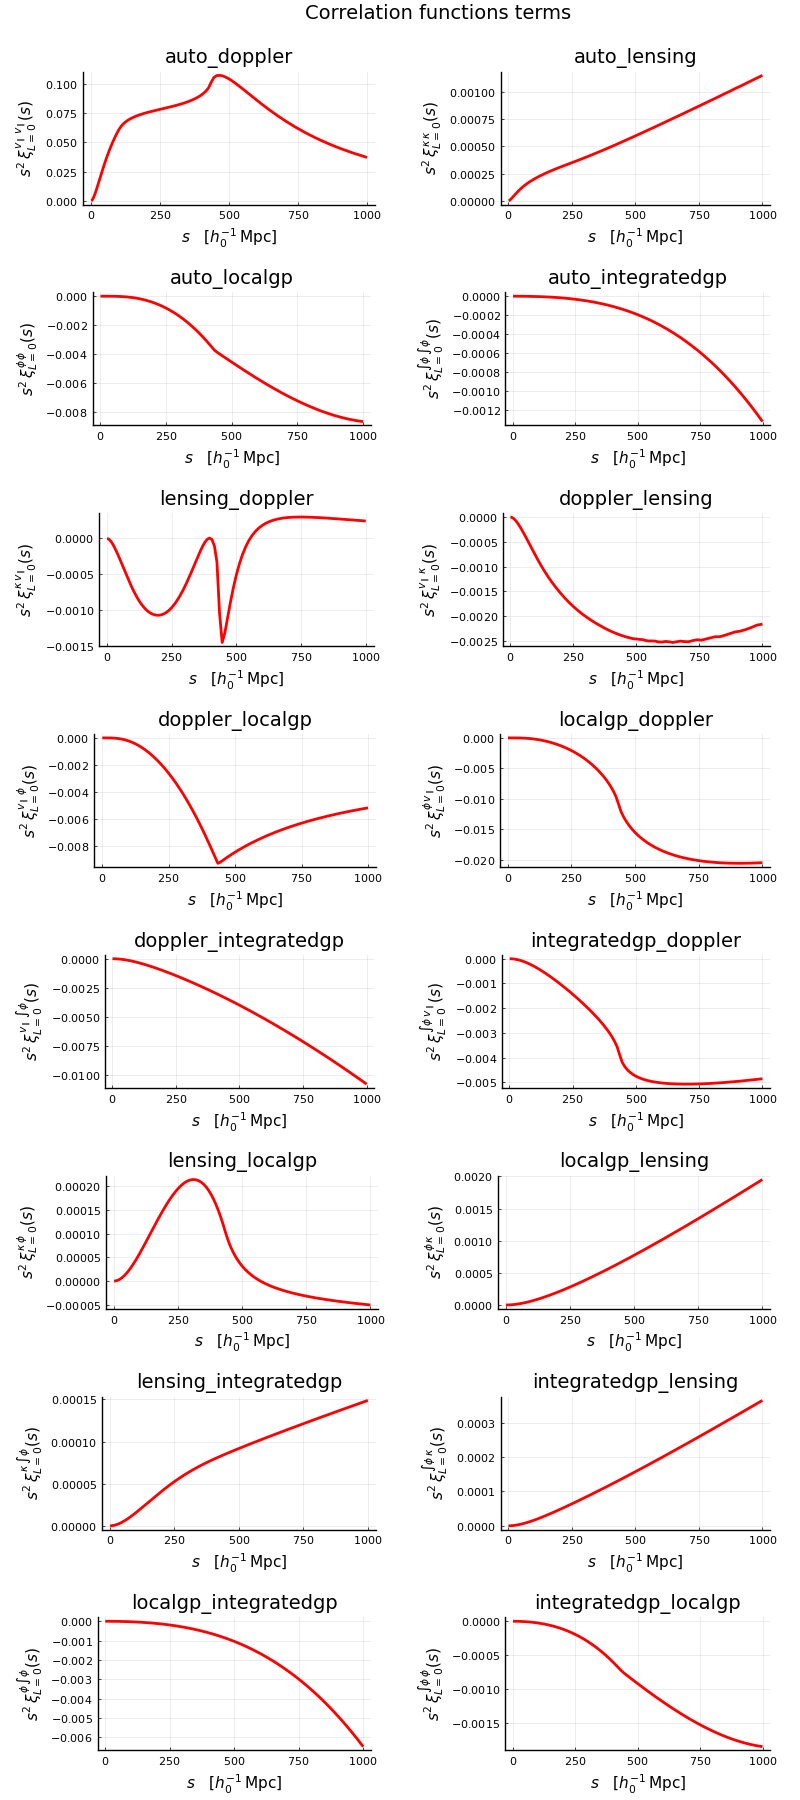

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/matteofoglieni/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


In [11]:
pyplot()
ps = [plot() for i in 1:length(IMPLEMENTED_GR_EFFECTS)]

title = plot(title = "Correlation functions terms", grid=false, 
    showaxis = false, bottom_margin = -50Plots.px, ticks=false)

legend_pos_norm=[
    :bottomleft, :topright, :bottomleft, :bottomleft,
    :topleft, :topleft, :topleft, :topleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
    :bottomleft, :bottomleft, :bottomleft, :bottomleft,
]

legend_pos_square=[
    :bottom, :topleft, :bottomleft, :bottomleft,
    :bottomright, :topright, :bottomright, :bottomright,
    :topleft, :bottomright, :topright, :topleft,
    :bottomright, :topleft, :bottomleft, :bottomleft,
]

for i in 1:length(IMPLEMENTED_GR_EFFECTS)
    my_xs = my_all_ss[i]
    my_ys = my_all_ξs[i]

    ps[i] = plot(
        my_xs, my_ys .* my_xs .^2, 
        size=(300, 100),
        lw=2, lc="red", ls=:solid,
        #label = "My",
        title=IMPLEMENTED_GR_EFFECTS[i], 
        #legend=legend_pos_square[i],
        legend=false,
        xlabel=L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel=L"s^2 \, " * ξs_names[i],
        #xaxis=:log,
        #yaxis=:log,
        top_margins=15Plots.px,
    )
end

l = @layout [A{0.05h}; a b ; c d ; e f ; g h ; i l ; m n ; o p ; q r ]
P = plot(title, ps..., layout=l, 
    left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(800,1800))

#savefig(P, "xi_all_cf_L$L"*".pdf")
#display(P)

In [12]:
#GaPSE.print_map_ξ_multipole(cosmo, "ALL_CF_files/xi_lensing_doppler_L0.txt", 
#    "lensing_doppler"; use_windows = false, N_χs = 50, N_μs = 30)

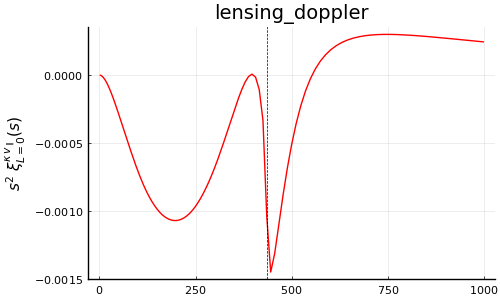

In [13]:
i = 5
effect = GR_EFFECT_INDEXED[i]

my_xs = my_all_ss[INDEX_GR_EFFECT[effect]]
my_ys = my_all_ξs[INDEX_GR_EFFECT[effect]] 

S_VLIM = cosmo.s_eff
S_VLIM_F = @sprintf("%.2f", S_VLIM)

pyplot()
P = plot(
    my_xs, my_ys .* my_xs .^2,
    #xaxis=:log, 
    #yaxis=:log, 
    lc=:red, ls=:solid,
    size=(500, 300),
    #label="My", 
    title=effect,
    ylabel=L"$s^2 \;$" * ξs_names[INDEX_GR_EFFECT[effect]],
    #legend=legend_pos_square[INDEX_GR_EFFECT[effect]],
    legend=:false,
)
vline!(P, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

#savefig(P, "xi_"*"$effect"*"_L$L"*".pdf")
#display(P)